### 1. DATA UNDERSTANDING

In [452]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import warnings
import numpy as np
warnings.filterwarnings('ignore')

from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, precision_recall_curve


%matplotlib inline

Load data dan cek info data

In [453]:
train_path = "train.csv"
test_path = "test.csv"

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

print("Training Data Info:")
train.info()

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8030 entries, 0 to 8029
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8030 non-null   int64  
 1   Surname             8030 non-null   object 
 2   CreditScore         7603 non-null   float64
 3   Geography           8030 non-null   object 
 4   Gender              7607 non-null   object 
 5   Age                 7588 non-null   float64
 6   Tenure              8030 non-null   int64  
 7   Balance             8030 non-null   float64
 8   NumOfProducts       8030 non-null   int64  
 9   HasCrCard           8030 non-null   object 
 10  IsActiveMember      7628 non-null   object 
 11  EstimatedSalary     7664 non-null   float64
 12  Complain            8030 non-null   object 
 13  Satisfaction Score  8030 non-null   int64  
 14  Card Type           8030 non-null   object 
 15  Point Earned        8030 non-null  

In [454]:
print("\nTesting Data Info:")
test.info()


Testing Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2000 non-null   int64  
 1   Surname             2000 non-null   object 
 2   CreditScore         2000 non-null   int64  
 3   Geography           2000 non-null   object 
 4   Gender              2000 non-null   object 
 5   Age                 2000 non-null   int64  
 6   Tenure              2000 non-null   int64  
 7   Balance             2000 non-null   float64
 8   NumOfProducts       2000 non-null   int64  
 9   HasCrCard           2000 non-null   object 
 10  IsActiveMember      2000 non-null   object 
 11  EstimatedSalary     2000 non-null   float64
 12  Complain            2000 non-null   object 
 13  Satisfaction Score  2000 non-null   int64  
 14  Card Type           2000 non-null   object 
 15  Point Earned        2000 non-null  

Drop kolom surname karena tidak dibutuhkan saat train data

In [455]:
train = train.drop(columns=['Surname'])
test = test.drop(columns=['Surname'])

train.head()

,ID,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,727.0,Spain,Male,38.0,2,62276.99,1,Yes,Yes,59280.79,No,4,DIAMOND,757,0
1,2,529.0,France,Female,29.0,8,0.00,2,Yes,NaN,19842.11,No,3,SILVER,476,0
2,3,589.0,France,Female,50.0,4,0.00,2,No,Yes,182076.97,No,4,PLATINUM,441,0
3,4,515.0,France,Male,40.0,0,109542.29,1,Yes,Yes,166370.81,No,5,GOLD,312,0
4,5,528.0,Spain,Male,43.0,7,97473.87,2,Yes,Yes,159823.16,No,3,PLATINUM,654,0


In [456]:
test.head()

,ID,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,2001,693,Germany,Male,44,5,124601.58,2,Yes,Yes,46998.13,Yes,2,SILVER,408
1,2002,607,Germany,Male,29,7,102609.00,1,Yes,No,163257.44,No,5,DIAMOND,800
2,2003,689,Spain,Male,73,1,108555.07,1,No,Yes,167969.15,No,1,PLATINUM,623
3,2004,660,France,Female,38,5,110570.78,2,Yes,No,195906.59,No,1,SILVER,472
4,2005,503,France,Male,38,1,0.00,2,Yes,Yes,95153.24,No,2,DIAMOND,433


Analisis distribusi target dan visualiasi semua kolom numerik

Exited
0    6428
1    1602
Name: count, dtype: int64


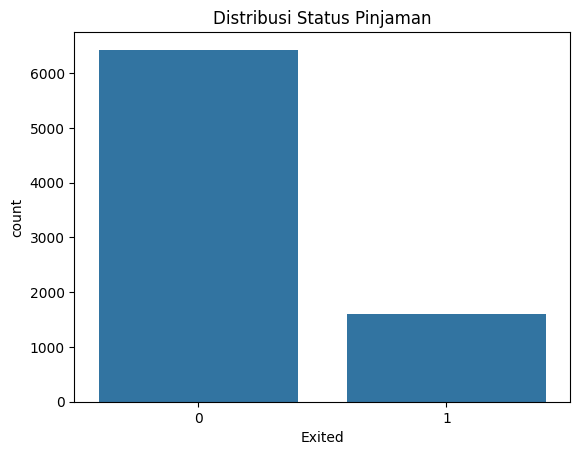

In [457]:
target_distribution = train['Exited'].value_counts()
print(target_distribution)

sns.countplot(x='Exited', data=train)
plt.title('Distribusi Status Pinjaman')
plt.show()

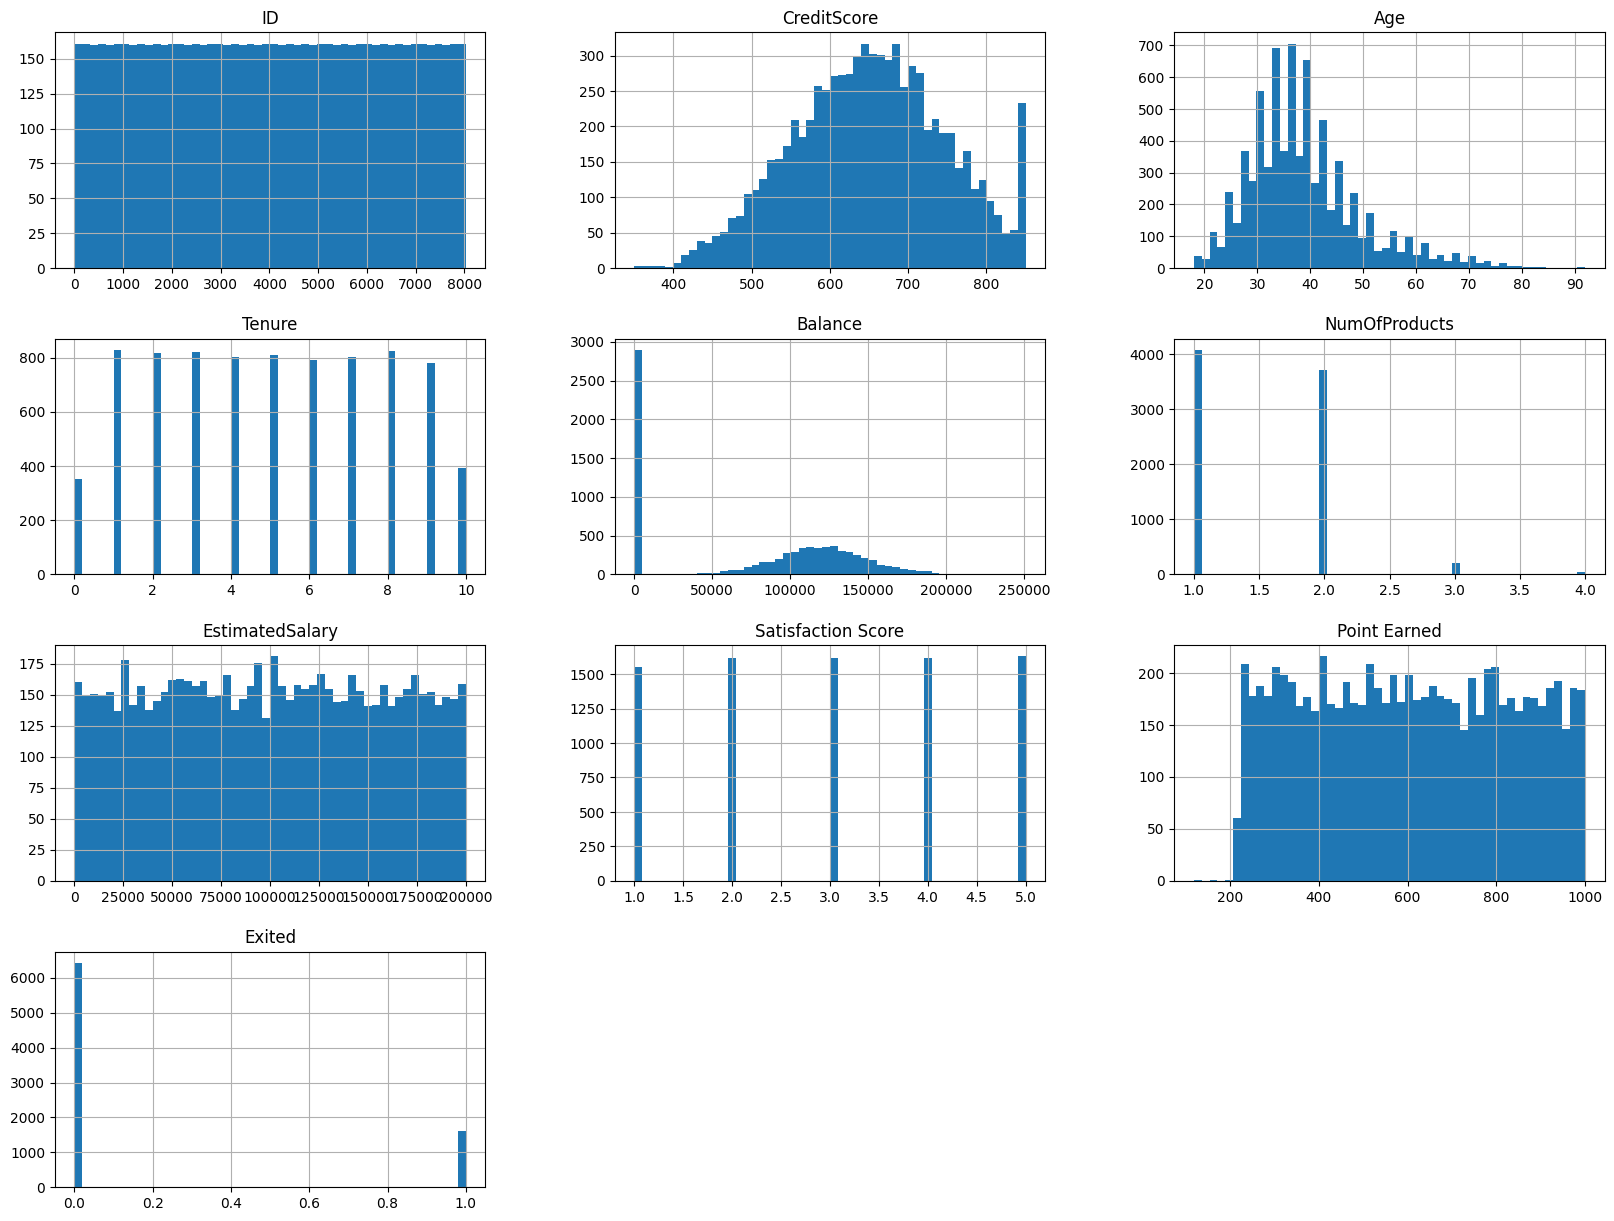

In [458]:
train.hist(bins=50, figsize=(20, 15))
plt.show()

### 2. Data Preprocessing

Cek nilai null dan duplikat

In [459]:
print("Number of duplicated rows in training data:", train.duplicated().sum())
print("Number of duplicated rows in testing data:", test.duplicated().sum())

Number of duplicated rows in training data: 0
Number of duplicated rows in testing data: 0


In [460]:
print("Null values in training data:")
print(train.isnull().sum())

Null values in training data:
ID                      0
CreditScore           427
Geography               0
Gender                423
Age                   442
Tenure                  0
Balance                 0
NumOfProducts           0
HasCrCard               0
IsActiveMember        402
EstimatedSalary       366
Complain                0
Satisfaction Score      0
Card Type               0
Point Earned            0
Exited                  0
dtype: int64


In [461]:
print("\nNull values in testing data:")
print(test.isnull().sum())


Null values in testing data:
ID                    0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


In [462]:
train['CreditScore'].fillna(train['CreditScore'].mean(), inplace=True)
train['Age'].fillna(train['Age'].median(), inplace=True)
train['EstimatedSalary'].fillna(train['EstimatedSalary'].mean(), inplace=True)

train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['IsActiveMember'].fillna(train['IsActiveMember'].mode()[0], inplace=True)

print(train.isnull().sum())

ID                    0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
Exited                0
dtype: int64


One hot encoding untuk data object agar berubah menjadi data kategorikal (bool) 

In [463]:
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type']

df_train = pd.get_dummies(train, columns=categorical_cols, drop_first=True)
df_test = pd.get_dummies(test, columns=categorical_cols, drop_first=True)

df_train, df_test = df_train.align(df_test, join='left', axis=1, fill_value=0)

In [464]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2000 non-null   int64  
 1   CreditScore         2000 non-null   int64  
 2   Age                 2000 non-null   int64  
 3   Tenure              2000 non-null   int64  
 4   Balance             2000 non-null   float64
 5   NumOfProducts       2000 non-null   int64  
 6   EstimatedSalary     2000 non-null   float64
 7   Satisfaction Score  2000 non-null   int64  
 8   Point Earned        2000 non-null   int64  
 9   Exited              2000 non-null   int64  
 10  Geography_Germany   2000 non-null   bool   
 11  Geography_Spain     2000 non-null   bool   
 12  Gender_Male         2000 non-null   bool   
 13  HasCrCard_Yes       2000 non-null   bool   
 14  IsActiveMember_Yes  2000 non-null   bool   
 15  Complain_Yes        2000 non-null   bool   
 16  Card T

In [465]:
df_train['CreditScore'] = df_train['CreditScore'].astype(int)
df_train['Age'] = df_train['Age'].astype(int)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8030 entries, 0 to 8029
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8030 non-null   int64  
 1   CreditScore         8030 non-null   int64  
 2   Age                 8030 non-null   int64  
 3   Tenure              8030 non-null   int64  
 4   Balance             8030 non-null   float64
 5   NumOfProducts       8030 non-null   int64  
 6   EstimatedSalary     8030 non-null   float64
 7   Satisfaction Score  8030 non-null   int64  
 8   Point Earned        8030 non-null   int64  
 9   Exited              8030 non-null   int64  
 10  Geography_Germany   8030 non-null   bool   
 11  Geography_Spain     8030 non-null   bool   
 12  Gender_Male         8030 non-null   bool   
 13  HasCrCard_Yes       8030 non-null   bool   
 14  IsActiveMember_Yes  8030 non-null   bool   
 15  Complain_Yes        8030 non-null   bool   
 16  Card T

Split data

In [466]:
X = df_train.drop('Exited', axis=1)
y = df_train['Exited']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((6424, 18), (1606, 18), (6424,), (1606,))

Pemetaan data numerikal 

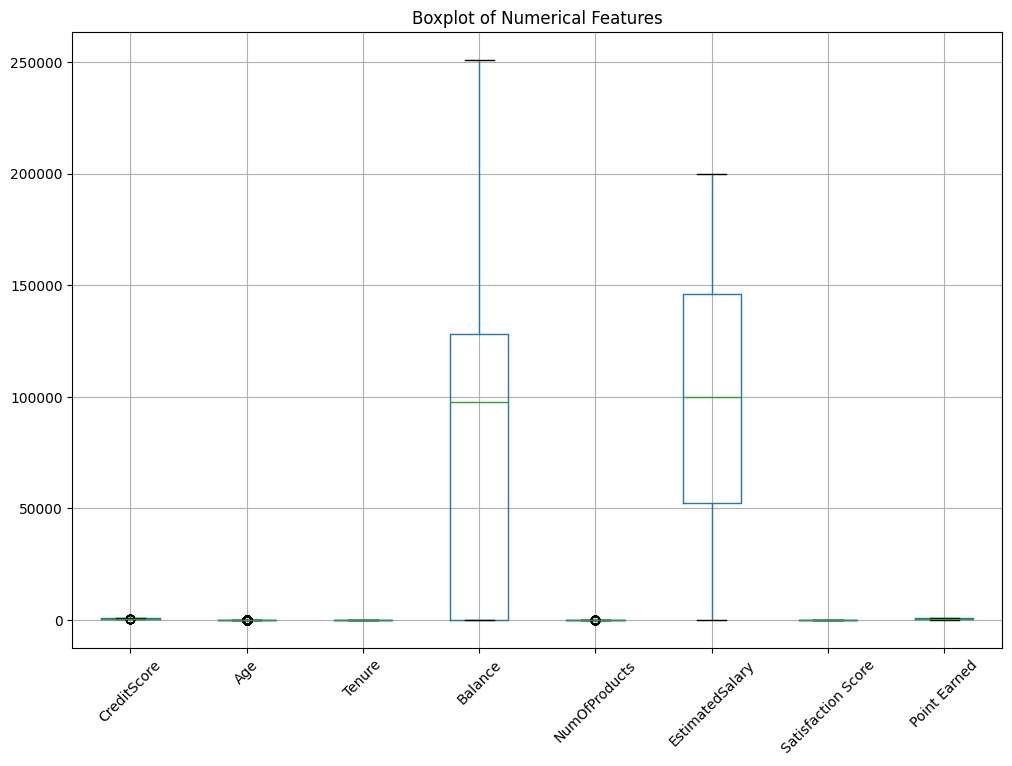

In [467]:
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

plt.figure(figsize=(12, 8))
X_train[numerical_cols].boxplot() 
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Features')
plt.show()

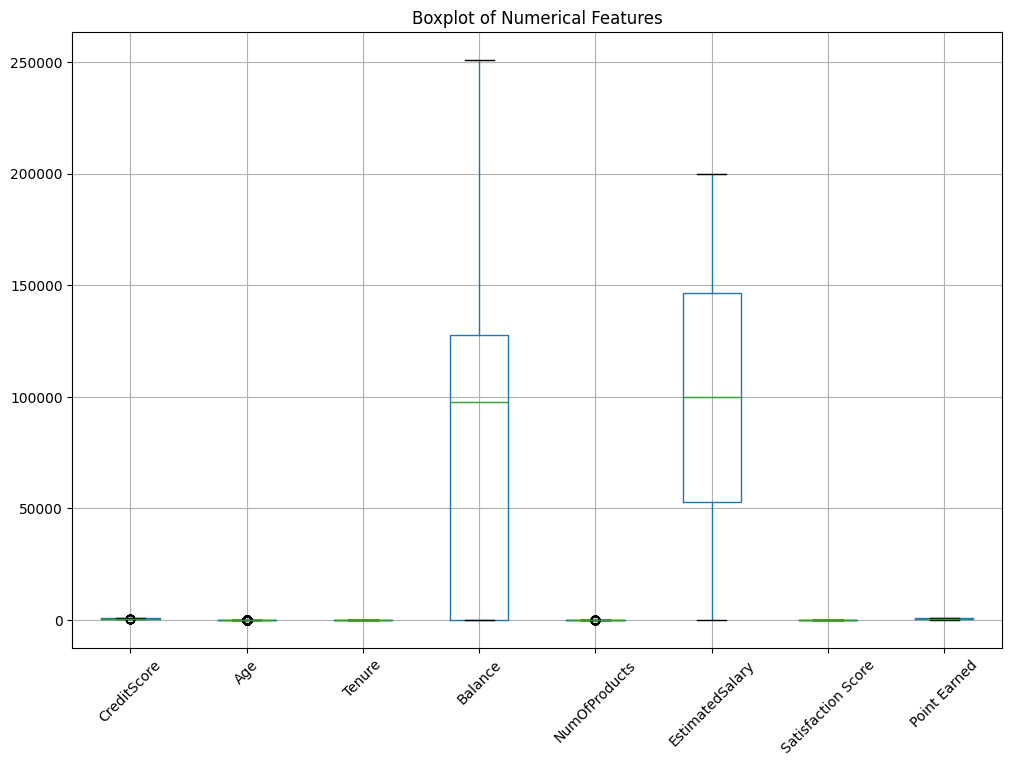

In [468]:
plt.figure(figsize=(12, 8))
df_train[numerical_cols].boxplot() 
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Features')
plt.show()

Lakukan standard scaling untuk memperkecil skala

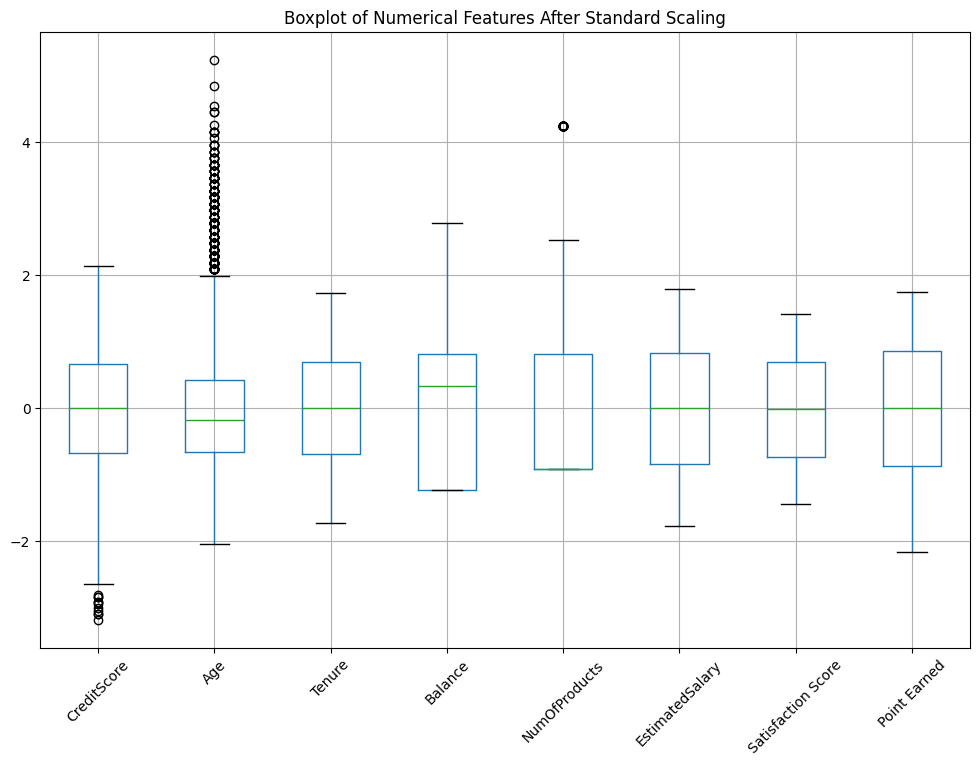

In [469]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

X_train_df = pd.DataFrame(X_train, columns=X_train.columns)
X_test_df = pd.DataFrame(df_test, columns=X_train.columns)

plt.figure(figsize=(12, 8))
X_train_df[numerical_cols].boxplot() 
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Features After Standard Scaling')
plt.show()

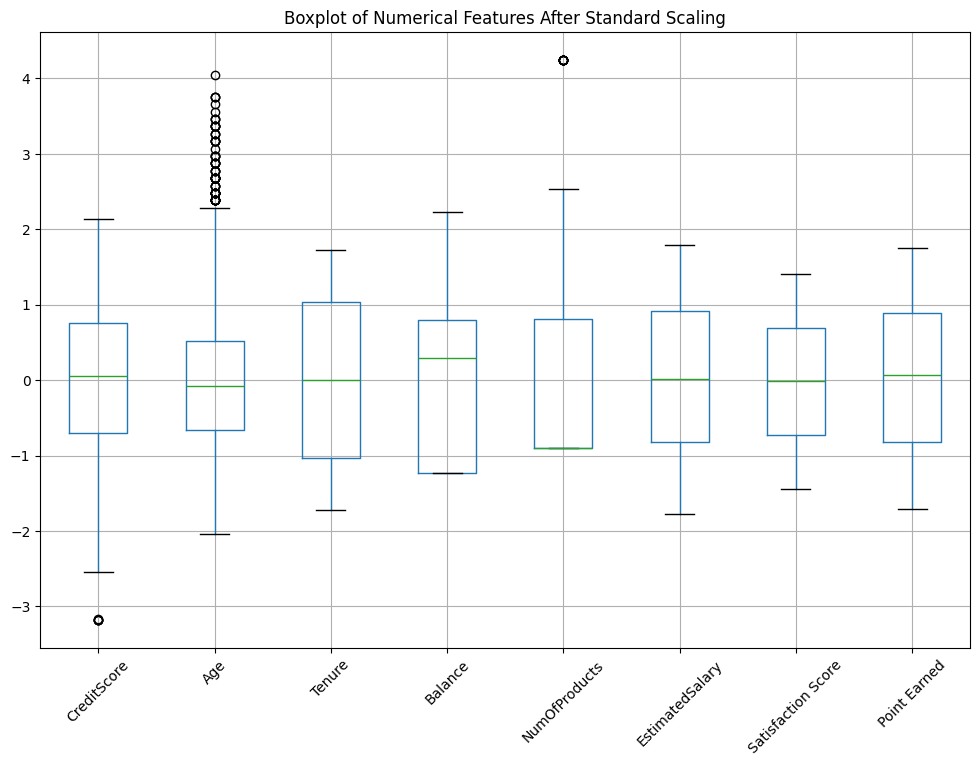

In [470]:
plt.figure(figsize=(12, 8))
X_test_df[numerical_cols].boxplot() 
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Features After Standard Scaling')
plt.show()

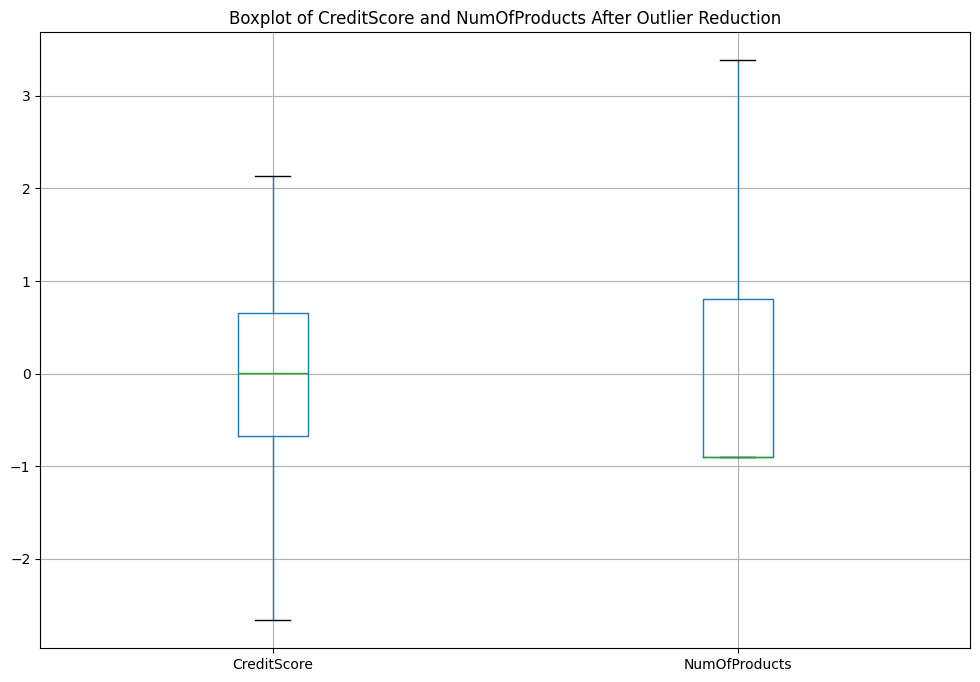

In [471]:
Q1 = X_train[['CreditScore', 'NumOfProducts']].quantile(0.25)
Q3 = X_train[['CreditScore', 'NumOfProducts']].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X_train[['CreditScore', 'NumOfProducts']] = np.where(X_train[['CreditScore', 'NumOfProducts']] < lower_bound, lower_bound, X_train[['CreditScore', 'NumOfProducts']])
X_train[['CreditScore', 'NumOfProducts']] = np.where(X_train[['CreditScore', 'NumOfProducts']] > upper_bound, upper_bound, X_train[['CreditScore', 'NumOfProducts']])

plt.figure(figsize=(12, 8))
X_train.boxplot(column=['CreditScore', 'NumOfProducts'])
plt.title('Boxplot of CreditScore and NumOfProducts After Outlier Reduction')
plt.show()

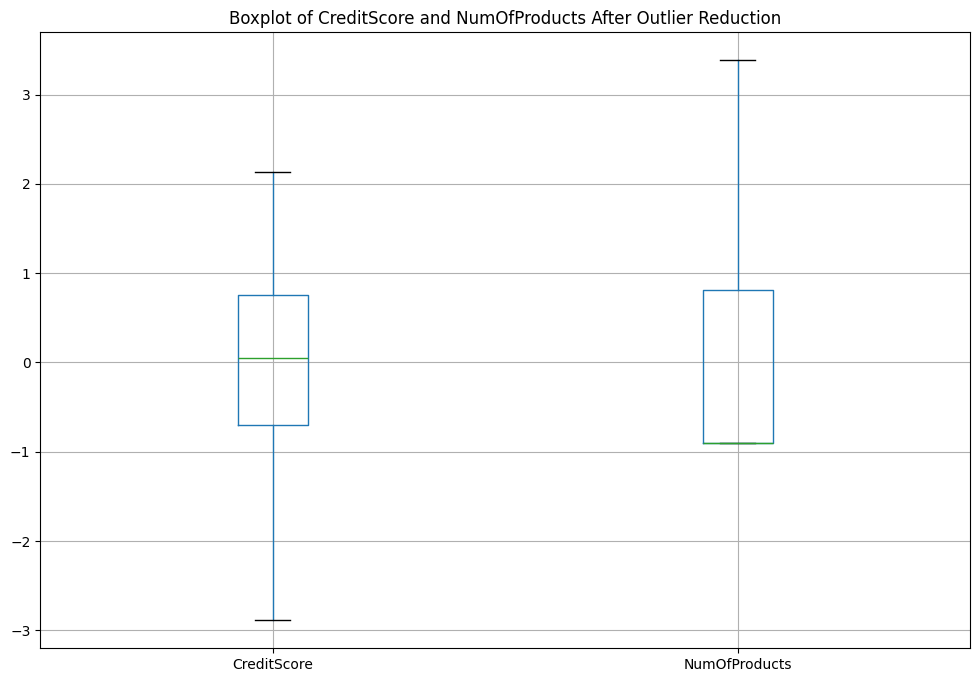

In [472]:
Q1 = X_test_df[['CreditScore', 'NumOfProducts']].quantile(0.25)
Q3 = X_test_df[['CreditScore', 'NumOfProducts']].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X_test_df[['CreditScore', 'NumOfProducts']] = np.where(X_test_df[['CreditScore', 'NumOfProducts']] < lower_bound, lower_bound, X_test_df[['CreditScore', 'NumOfProducts']])
X_test_df[['CreditScore', 'NumOfProducts']] = np.where(X_test_df[['CreditScore', 'NumOfProducts']] > upper_bound, upper_bound, X_test_df[['CreditScore', 'NumOfProducts']])

plt.figure(figsize=(12, 8))
X_test_df.boxplot(column=['CreditScore', 'NumOfProducts'])
plt.title('Boxplot of CreditScore and NumOfProducts After Outlier Reduction')
plt.show()

### 3. Modelling

Pemodelan dengan xgboost 

In [473]:
from collections import Counter

print("Distribusi sebelum SMOTE:", Counter(y_train))


from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)  
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribusi setelah SMOTE:", Counter(y_train_resampled))


Distribusi sebelum SMOTE: Counter({0: 5130, 1: 1294})
Distribusi setelah SMOTE: Counter({1: 5130, 0: 5130})


In [474]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="auc", random_state=42, )
model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Sebelum Tuning:
Accuracy: 0.9987546699875467
Precision: 0.9935483870967742
Recall: 1.0
F1 Score: 0.9967637540453075
ROC AUC Score: 0.9995572609208973


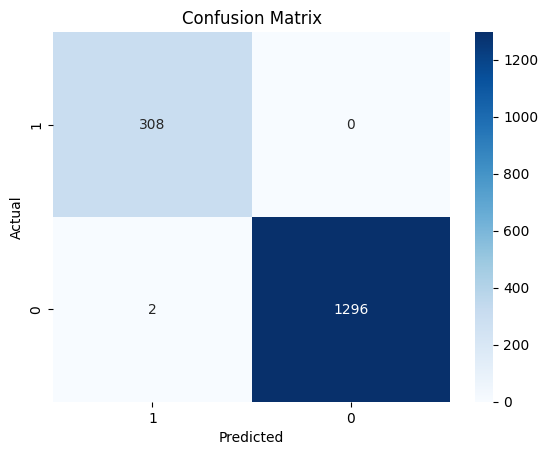

In [475]:
y_pred = model.predict(X_val)
y_pred_prob = model.predict_proba(X_val)[:, 1]

print("Sebelum Tuning:")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_pred_prob))

conf_matrix = confusion_matrix(y_val, y_pred, labels=[1, 0])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['1', '0'],
            yticklabels=['1', '0'])

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Pemetaan fitur importance untuk melihat fitur mana yang paling berpengaruh saat training data

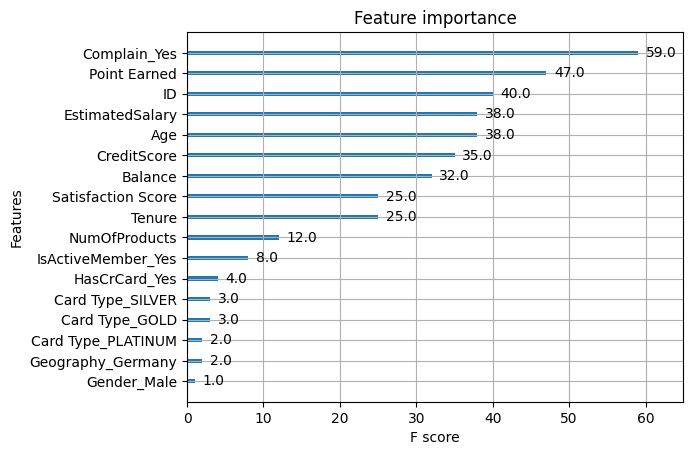

In [476]:
plot_importance(model)
plt.show()

Hyperparamater tuning untuk hasil prediksi yang lebih baik

In [477]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "learning_rate": [0.01, 0.1],
    "max_depth": [4, 6],
    "min_child_weight": [1, 3],
    "subsample": [0.8, 0.9],
    "colsample_bytree": [0.8, 0.9],
    "n_estimators": [100, 300],
    "scale_pos_weight": [6] 
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print("Best Estimator:", best_model)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 100, 'scale_pos_weight': 6, 'subsample': 0.9}
Best Score: 0.9995581401981078
Best Estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None,

Sesudah Tuning:
Accuracy: 0.9987546699875467
Precision: 0.9935483870967742
Recall: 1.0
F1 Score: 0.9967637540453075
ROC AUC Score: 0.9997723770836251


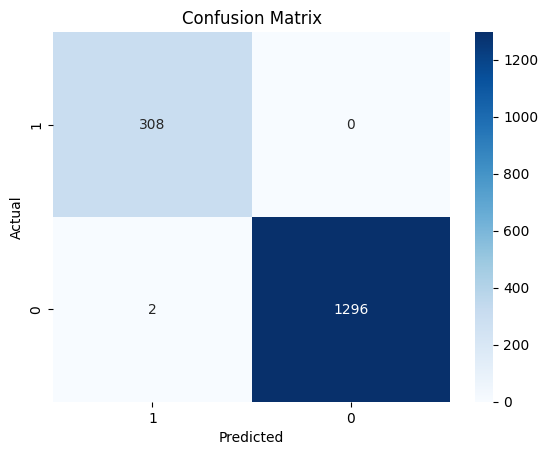

In [478]:
y_pred_tuned = best_model.predict(X_val)
y_pred_prob_tuned = best_model.predict_proba(X_val)[:, 1]

print("Sesudah Tuning:")
print("Accuracy:", accuracy_score(y_val, y_pred_tuned))
print("Precision:", precision_score(y_val, y_pred_tuned))
print("Recall:", recall_score(y_val, y_pred_tuned))
print("F1 Score:", f1_score(y_val, y_pred_tuned))
print("ROC AUC Score:", roc_auc_score(y_val, y_pred_prob_tuned))

conf_matrix = confusion_matrix(y_val, y_pred_tuned, labels=[1, 0])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['1', '0'],
            yticklabels=['1', '0'])

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [479]:
y_pred_tuned = best_model.predict(X_test_df)
y_pred_prob_tuned = best_model.predict_proba(X_test_df)[:, 1]

In [480]:
submission_df = pd.DataFrame({
    'ID': X_test_df['ID'],
    'Exited': y_pred_tuned,
})

submission_df.to_csv('submission fix.csv', index=False)

Skor Kaggle Berada di 0.9902